In [1]:
%load_ext autoreload
%autoreload 2

# First Order Systems Examples

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import sys, os

sys.path.append(os.path.abspath(os.path.join('..')))

import ode

## First Order Systems of 2 Variables

System of ODEs with 2 variables:

$$\frac{dx}{dt} = F(x, y)$$

$$\frac{dy}{dt} = G(x, y)$$

With initial conditions $(x(0), y(0)) = (x_0, y_0)$

In [3]:
k = 0.9
l = -0.9
alpha = -0.2
beta = -0.2
g = 0.5
h = 0.7

def F(x, y):
    global k
    global alpha
    global g
    return k*y - alpha*x + g

def G(x, y):
    global l
    global beta
    global h
    return l*x - beta*y + h

Initial Conditions

In [4]:
# Initial Condition y0 = [x0, y0]
y0 = [2.0, 1]

define a solver function containing the `ode.first_order_system_2vars()` class and the `solve_system()` method.

In [5]:
def solver_(F, G, y0):
    # Use the parameters to create an instance of the ode.second_order_system() class
    model = ode.first_order_system_2vars(F, G, y0, [0, 10])

    # Solve the equation
    return model.solve_system(), np.arange(model.t_int[0], model.t_int[1], model.dt)

Plug in the parameters that are the ODEs coefficients and initial conditions.

In [6]:
(x, y), t = solver_(lambda x, y: F(x, y), lambda x, y: G(x, y), y0) 

### Phase Plot:

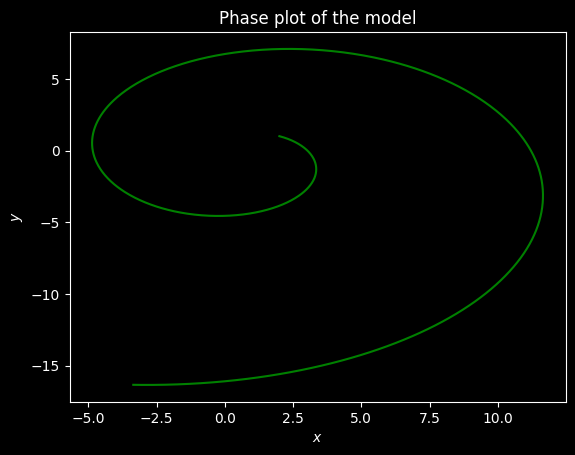

In [7]:
# Plot 0
plt.figure(0)
plt.plot(x, y, color='green')
plt.title('Phase plot of the model', loc='center')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

### Plots of $x$ and $y$:

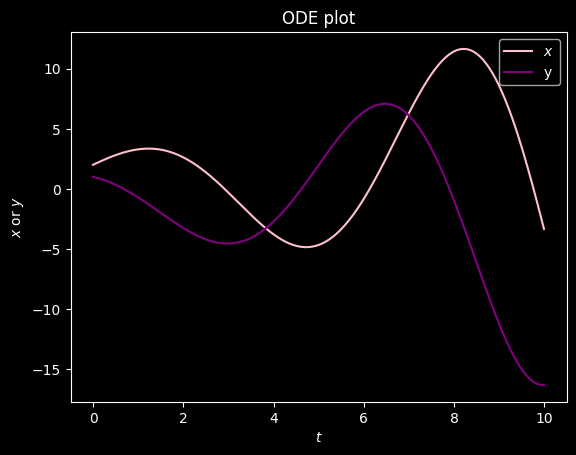

In [8]:
# Plot 1
plt.figure(1)
plt.plot(t, x, color='pink')
plt.plot(t, y, color='purple')
plt.title('ODE plot', loc='center')
plt.xlabel('$t$')
plt.ylabel('$x$ or $y$')
plt.legend(['$x$', 'y'])
plt.show()

### Equilibrium Point

In [9]:
model_ = ode.first_order_system_2vars(lambda x, y: F(x, y), lambda x, y: G(x, y), y0, [0, 10])

equilib = model_.equilibrium()

print(f'Equilibrium point is {equilib}')

Equilibrium point is [ 0.62352941 -0.69411765]


### Plot of $x$ and $y$ tending to equilibrium

$x$ with $t$ plot.

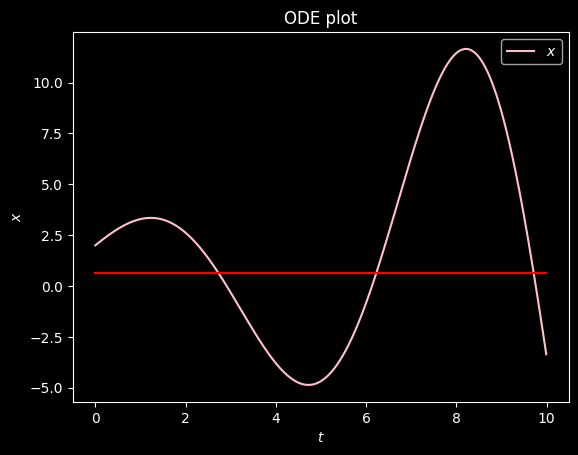

In [10]:
# Plot 2
plt.figure(2)
plt.plot(t, x, color='pink')
plt.plot(t, [equilib[0] for _ in range(len(t))], color='red')
plt.title('ODE plot', loc='center')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend(['$x$'])
plt.show()

$y$ with $t$ plot.

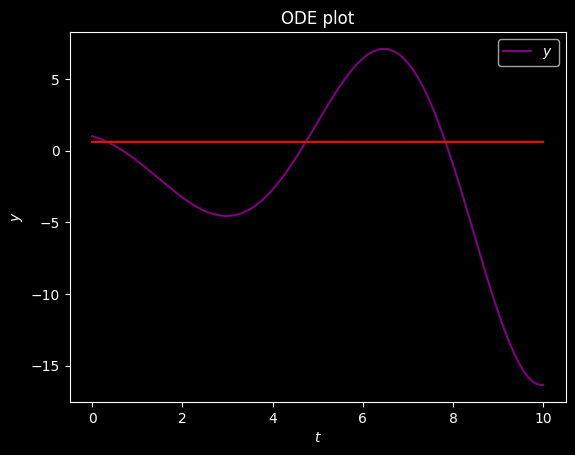

In [11]:
# Plot 3
plt.figure(3)
plt.plot(t, y, color='purple')
plt.plot(t, [equilib[0] for _ in range(len(t))], color='red')
plt.title('ODE plot', loc='center')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend(['$y$'])
plt.show()

As seen from the phase plot and both plots of $x(t)$ and $y(t)$, the solution tends away from the equilibrium, as $t$ increases. Hence it can be said that this equilibrium point is unstable.

## First Order Systems of 3 variables

System of ODEs with 3 variables:

$$\frac{dx}{dt} = F(x, y, z)$$

$$\frac{dy}{dt} = G(x, y, z)$$

$$\frac{dz}{dt} = H(x, y, z)$$

With initial conditions $(x(0), y(0), z(0)) = (x_0, y_0, z_0)$

### SIR Model

The SIR Model is governed by the following System:

$$\frac{dS}{dt} = - \beta S I$$

$$\frac{dI}{dt} = \beta S I - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

And Assuming a fixed population, where $S(t) + I(t) + R(t) = N$, for $N$ is the total population.

For more information click <a href="https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology)">here</a>.



In 1978, a study was conducted and reported in the British Medical Journal of an
outbreak of influenza in a boys boarding school. The school had a population of 763 boys.
Of these 512 were confined to bed during the epidemic, which lasted from 22 January until
4 February. It seems that one infected boy initiated the epidemic. At the outbreak of the
epidemic, none of the boys had previously had influenza, so no resistance to the infection was
present. 

The Initial Conditions are:

$N = 763$; 
$\gamma = 0.44$; 
$\beta=2.8\times 10^{-3}$; 
$I(0) = 1$; 
$S(0) = 762$.

In [12]:
# SIR Model
beta_sir = 0.00218
gamma_sir = 0.44
N = 763

def F(S, I, R):
    global beta_sir
    return -beta_sir*I*S

def G(S, I, R):
    global beta_sir
    global gamma_sir
    return beta_sir*S*I - gamma_sir*I

def H(S, I, R):
    global gamma_sir
    return gamma_sir*I

Initial Conditions. There sum adds to the given $N$.

In [13]:
# Initial Conditions
y0_sir = [762, 1, 0]

define a solver function containing the `ode.first_order_system_3vars()` class and the `solve_system()` method.

In [14]:
def solver_3var(F, G, H, y0):
    # Use the parameters to create an instance of the ode.second_order_system() class
    model = ode.First_order_systems_3vars(F, G, H, y0, [0, 21])

    # Solve the equation
    return model.solve_system(), np.arange(model.t_int[0], model.t_int[1], model.dt)

Solving

In [15]:
(S, I, R), t = solver_3var(lambda S, I, R: F(S, I, R), lambda S, I, R: G(S, I, R), lambda S, I, R: H(S, I, R), y0_sir)

### Plot of the SIR Model

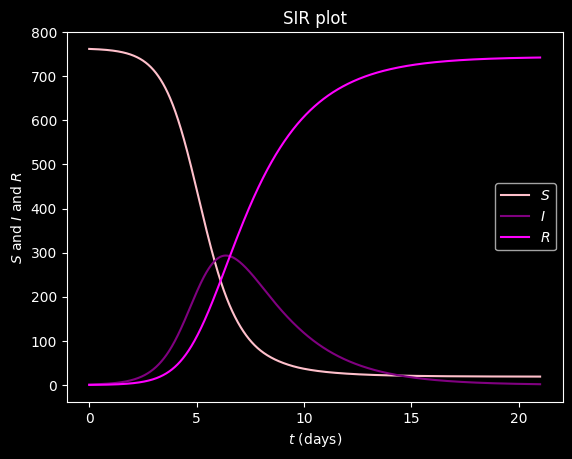

In [16]:
plt.figure(3)
plt.plot(t, S, color='pink')
plt.plot(t, I, color='purple')
plt.plot(t, R, color='magenta')
plt.title('SIR plot', loc='center')
plt.xlabel('$t$ (days)')
plt.ylabel('$S$ and $I$ and $R$')
plt.legend(['$S$', '$I$', '$R$'])
plt.show()

As seen in the above plot the susceptible population $S$ decreases as time increases since they move into the infected $I$ category. But as time $t$ increases the infected population recover, therefore causing the recovered $R$ population to increase and the infected population to decrease as time goes on. 